In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Performing PCA with an Undercomplete Linear Autoencoder

Build 3D dataset:

In [16]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [17]:
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder]) # Cascade two models

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

/home/benson516/ml/my_env/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [18]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 1s 16ms/step - loss: 0.5088
Epoch 2/20
2/2 [==============================] - 0s 8ms/step - loss: 0.4299
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3816
Epoch 4/20
2/2 [==============================] - 0s 15ms/step - loss: 0.3478
Epoch 5/20
2/2 [==============================] - 0s 9ms/step - loss: 0.3225
Epoch 6/20
2/2 [==============================] - 0s 14ms/step - loss: 0.3013
Epoch 7/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2849
Epoch 8/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2712
Epoch 9/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2584
Epoch 10/20
2/2 [==============================] - 0s 7ms/step - loss: 0.2469
Epoch 11/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2350
Epoch 12/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2239
Epoch 13/20
2/2 [==============================] - 0s 10ms/step - loss

In [19]:
codings = encoder.predict(X_train)

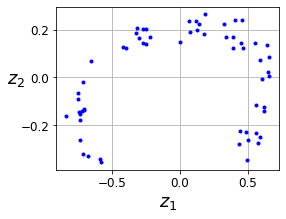

In [20]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Stacked Autoencoders
## Implementing a Stacked Autoencoder Using Keras

In [34]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [35]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=keras.optimizers.SGD(lr=1.5))

In [37]:
history = stacked_ae.fit(X_train, X_train, epochs=10) #,
#                          validation_data=[X_valid, X_valid])

Epoch 1/10
1719/1719 [==============================] - 49s 28ms/step - loss: 0.3050
Epoch 2/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.2978
Epoch 3/10
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2935 0s - loss: 0.2
Epoch 4/10
1719/1719 [==============================] - 51s 29ms/step - loss: 0.2907
Epoch 5/10
1719/1719 [==============================] - 61s 35ms/step - loss: 0.2889
Epoch 6/10
1719/1719 [==============================] - 72s 42ms/step - loss: 0.2873 0s - loss: 
Epoch 7/10
1719/1719 [==============================] - 86s 50ms/step - loss: 0.2862
Epoch 8/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.2852
Epoch 9/10
1719/1719 [==============================] - 69s 40ms/step - loss: 0.2844
Epoch 10/10
1719/1719 [==============================] - 65s 38ms/step - loss: 0.2837


## Visualizing the Reconstructions

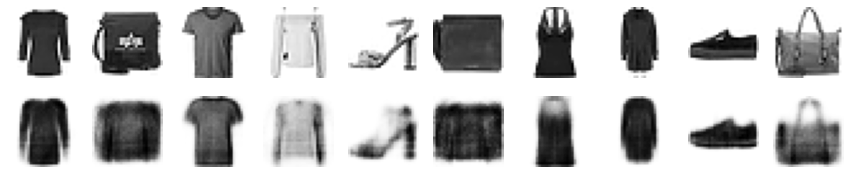

In [42]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def show_reconstructions(model, n_images=5):
    reconstructions = model.predict(X_valid[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(X_valid[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
        
show_reconstructions(stacked_ae, n_images=10)